Titanic Survival Prediction

In [1]:
import pandas as pd
import numpy as np
import matplotlib . pyplot as plt

from sklearn . model_selection import train_test_split
from sklearn . preprocessing import StandardScaler

In [3]:
dataset_path = 'titanic_modified_dataset.csv'
df = pd. read_csv (dataset_path ,index_col ='PassengerId')

In [4]:
dataset_arr = df.to_numpy().astype(np.float64)
X, y = dataset_arr[:, :-1], dataset_arr[:, -1]

In [5]:
intercept = np.ones((X.shape[0], 1))
X_b = np.concatenate((intercept, X), axis=1)

In [6]:
val_size = 0.2
test_size = 0.125
random_state = 2
is_shuffle = True

# Chia dữ liệu thành tập train và validation
X_train, X_val, y_train, y_val = train_test_split(
    X_b, y,
    test_size=val_size,
    random_state=random_state,
    shuffle=is_shuffle
)

# Chia dữ liệu train thành tập train và test
X_train, X_test, y_train, y_test = train_test_split(
    X_train, y_train,
    test_size=test_size,
    random_state=random_state,
    shuffle=is_shuffle
)

In [7]:
normalizer = StandardScaler()

# Chuẩn hóa dữ liệu tập train
X_train[:, 1:] = normalizer.fit_transform(X_train[:, 1:])

# Áp dụng cùng phép chuẩn hóa cho dữ liệu tập validation
X_val[:, 1:] = normalizer.transform(X_val[:, 1:])

# Áp dụng cùng phép chuẩn hóa cho dữ liệu tập test
X_test[:, 1:] = normalizer.transform(X_test[:, 1:])

In [8]:
def sigmoid (z) :
  return 1 / (1 + np. exp ( -z) )

In [9]:
def predict (X, theta ) :
  dot_product = np. dot (X, theta )
  y_hat = sigmoid ( dot_product )
  return y_hat

In [10]:
def compute_loss(y_hat, y):
    # Giới hạn các giá trị của y_hat để tránh tính toán log của 0
    y_hat = np.clip(y_hat, 1e-7, 1 - 1e-7)

    # Tính toán hàm mất mát (loss)
    return (-y * np.log(y_hat) - (1 - y) * np.log(1 - y_hat)).mean()

In [11]:
def compute_gradient(X, y, y_hat):
    # Tính toán gradient cho hàm mất mát
    return np.dot(X.T, (y_hat - y)) / y.size

In [12]:
def update_theta (theta , gradient , lr) :
  return theta - lr * gradient

In [13]:
def compute_accuracy(X, y, theta):
    # Dự đoán các giá trị y_hat bằng cách sử dụng hàm predict và làm tròn kết quả
    y_hat = predict(X, theta).round()

    # Tính toán độ chính xác bằng cách so sánh y_hat với y và lấy trung bình
    acc = (y_hat == y).mean()
    return acc

In [14]:
# Đặt các tham số cho quá trình học
lr = 0.01
epochs = 100
batch_size = 16

# Khởi tạo giá trị ngẫu nhiên cho theta
np.random.seed(random_state)
theta = np.random.uniform(size=X_train.shape[1])

In [15]:
train_accs = []
train_losses = []
val_accs = []
val_losses = []

for epoch in range(epochs):
    train_batch_losses = []
    train_batch_accs = []
    val_batch_losses = []
    val_batch_accs = []

    for i in range(0, X_train.shape[0], batch_size):
        X_i = X_train[i:i + batch_size]
        y_i = y_train[i:i + batch_size]

        y_hat = predict(X_i, theta)
        train_loss = compute_loss(y_hat, y_i)
        gradient = compute_gradient(X_i, y_i, y_hat)
        theta = update_theta(theta, gradient, lr)

        train_batch_losses.append(train_loss)
        train_acc = compute_accuracy(X_train, y_train, theta)
        train_batch_accs.append(train_acc)

        y_val_hat = predict(X_val, theta)
        val_loss = compute_loss(y_val_hat, y_val)
        val_batch_losses.append(val_loss)

        val_acc = compute_accuracy(X_val, y_val, theta)
        val_batch_accs.append(val_acc)

    train_batch_loss = sum(train_batch_losses) / len(train_batch_losses)
    val_batch_loss = sum(val_batch_losses) / len(val_batch_losses)
    train_batch_acc = sum(train_batch_accs) / len(train_batch_accs)
    val_batch_acc = sum(val_batch_accs) / len(val_batch_accs)

    train_losses.append(train_batch_loss)
    val_losses.append(val_batch_loss)
    train_accs.append(train_batch_acc)
    val_accs.append(val_batch_acc)

    print(f'\nEPOCH {epoch + 1}:\tTraining loss: {train_batch_loss:.3f}\tValidation loss: {val_batch_loss:.3f}')


EPOCH 1:	Training loss: 0.703	Validation loss: 0.599

EPOCH 2:	Training loss: 0.670	Validation loss: 0.582

EPOCH 3:	Training loss: 0.640	Validation loss: 0.567

EPOCH 4:	Training loss: 0.614	Validation loss: 0.555

EPOCH 5:	Training loss: 0.592	Validation loss: 0.544

EPOCH 6:	Training loss: 0.572	Validation loss: 0.535

EPOCH 7:	Training loss: 0.554	Validation loss: 0.528

EPOCH 8:	Training loss: 0.539	Validation loss: 0.522

EPOCH 9:	Training loss: 0.526	Validation loss: 0.517

EPOCH 10:	Training loss: 0.514	Validation loss: 0.513

EPOCH 11:	Training loss: 0.504	Validation loss: 0.509

EPOCH 12:	Training loss: 0.495	Validation loss: 0.507

EPOCH 13:	Training loss: 0.487	Validation loss: 0.505

EPOCH 14:	Training loss: 0.480	Validation loss: 0.503

EPOCH 15:	Training loss: 0.474	Validation loss: 0.502

EPOCH 16:	Training loss: 0.468	Validation loss: 0.501

EPOCH 17:	Training loss: 0.463	Validation loss: 0.500

EPOCH 18:	Training loss: 0.459	Validation loss: 0.500

EPOCH 19:	Training

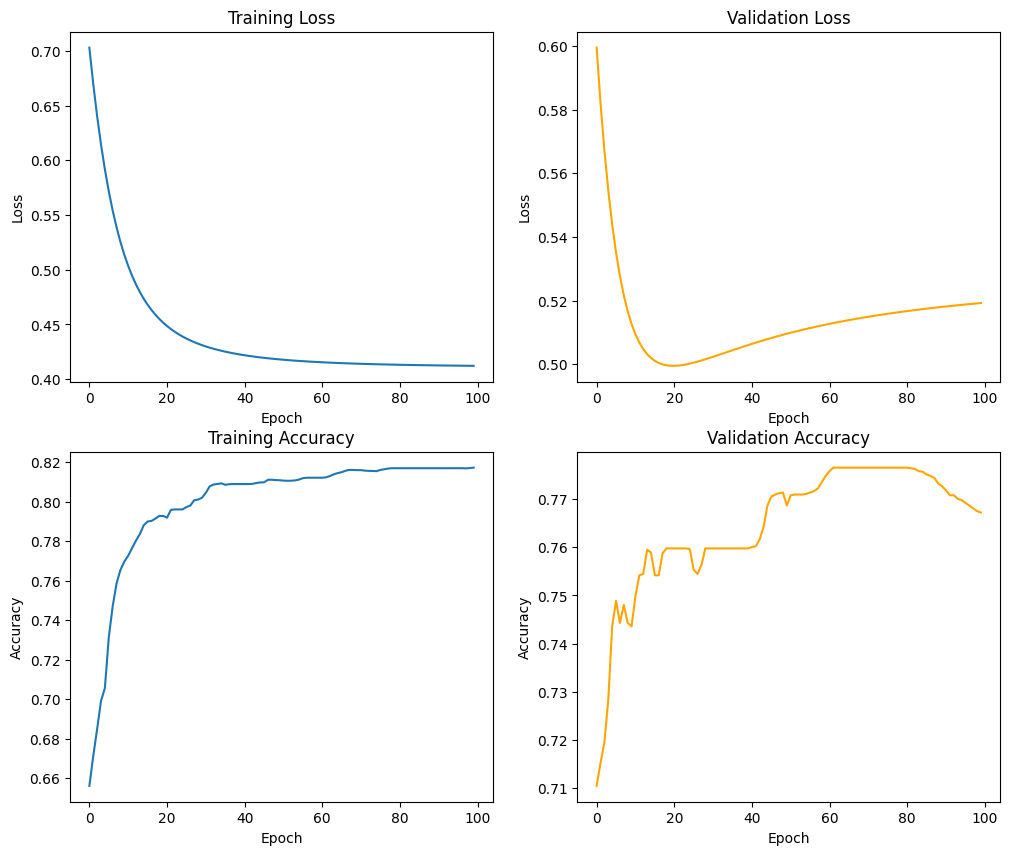

In [16]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(2, 2, figsize=(12, 10))

ax[0, 0].plot(train_losses)
ax[0, 0].set(xlabel='Epoch', ylabel='Loss')
ax[0, 0].set_title('Training Loss')

ax[0, 1].plot(val_losses, 'orange')
ax[0, 1].set(xlabel='Epoch', ylabel='Loss')
ax[0, 1].set_title('Validation Loss')

ax[1, 0].plot(train_accs)
ax[1, 0].set(xlabel='Epoch', ylabel='Accuracy')
ax[1, 0].set_title('Training Accuracy')

ax[1, 1].plot(val_accs, 'orange')
ax[1, 1].set(xlabel='Epoch', ylabel='Accuracy')
ax[1, 1].set_title('Validation Accuracy')

plt.show()

In [17]:
val_set_acc = compute_accuracy(X_val, y_val, theta)
test_set_acc = compute_accuracy(X_test, y_test, theta)

print('Evaluation on validation and test set:')
print(f'Validation Accuracy: {val_set_acc}')
print(f'Test Accuracy: {test_set_acc}')

Evaluation on validation and test set:
Validation Accuracy: 0.770949720670391
Test Accuracy: 0.7752808988764045


Twitter Sentiment Analysis

In [18]:
import pandas as pd
import numpy as np
import re
import nltk
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from nltk.tokenize import TweetTokenizer
from collections import defaultdict

In [19]:
dataset_path = 'sentiment_analysis.csv'
df = pd.read_csv(
    dataset_path,
    index_col='id'
)

In [20]:
def text_normalize(text):
    # Retweet old acronym "RT" removal
    text = re.sub(r'^RT[\s]+', '', text)

    # Hyperlinks removal
    text = re.sub(r'https?:\/\/.*[\r\n]*', '', text)

    # Hashtags removal
    text = re.sub(r'#', '', text)

    # Punctuation removal
    text = re.sub(r'[^\w\s]', '', text)

    # Tokenization
    tokenizer = TweetTokenizer(
        preserve_case=False,
        strip_handles=True,
        reduce_len=True
    )
    text_tokens = tokenizer.tokenize(text)

    return text_tokens

In [21]:
def get_freqs(df):
    freqs = defaultdict(lambda: 0)
    for idx, row in df.iterrows():
        tweet = row['tweet']
        label = row['label']

        tokens = text_normalize(tweet)
        for token in tokens:
            pair = (token, label)
            freqs[pair] += 1

    return freqs

In [22]:
def get_feature(text, freqs):
    tokens = text_normalize(text)

    X = np.zeros(3)
    X[0] = 1

    for token in tokens:
        X[1] += freqs[(token, 0)]
        X[2] += freqs[(token, 1)]

    return X

In [23]:
X = []
y = []

freqs = get_freqs(df)
for idx, row in df.iterrows():
    tweet = row['tweet']
    label = row['label']

    X_i = get_feature(tweet, freqs)

    X.append(X_i)
    y.append(label)

X = np.array(X)
y = np.array(y)

In [24]:
val_size = 0.2
test_size = 0.125
random_state = 2
is_shuffle = True

X_train, X_val, y_train, y_val = train_test_split(
    X, y,
    test_size=val_size,
    random_state=random_state,
    shuffle=is_shuffle
)

X_train, X_test, y_train, y_test = train_test_split(
    X_train, y_train,
    test_size=test_size,
    random_state=random_state,
    shuffle=is_shuffle
)

In [25]:
normalizer = StandardScaler()
X_train[:, 1:] = normalizer.fit_transform(X_train[:, 1:])
X_val[:, 1:] = normalizer.transform(X_val[:, 1:])
X_test[:, 1:] = normalizer.transform(X_test[:, 1:])

In [26]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def compute_loss(y_hat, y):
    y_hat = np.clip(y_hat, 1e-7, 1 - 1e-7)
    return (-y * np.log(y_hat) - (1 - y) * np.log(1 - y_hat)).mean()

def predict(X, theta):
    dot_product = np.dot(X, theta)
    y_hat = sigmoid(dot_product)
    return y_hat

def compute_gradient(X, y, y_hat):
    return np.dot(X.T, (y_hat - y)) / y.size

def update_theta(theta, gradient, lr):
    return theta - lr * gradient

def compute_accuracy(X, y, theta):
    y_hat = predict(X, theta).round()
    acc = (y_hat == y).mean()
    return acc

In [28]:
lr = 0.01
epochs = 200
batch_size = 128

np.random.seed(random_state)
theta = np.random.uniform(size=X_train.shape[1])

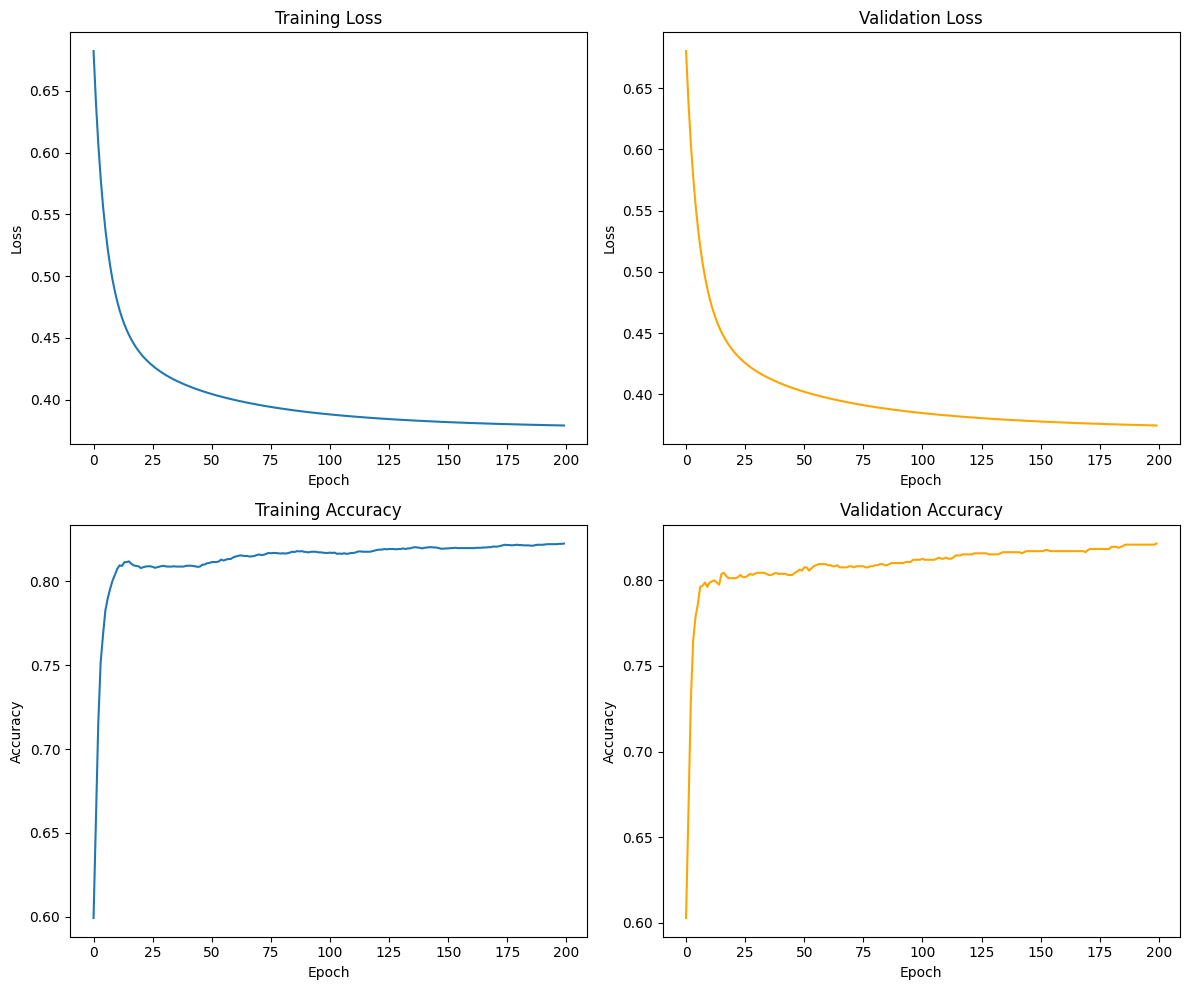

In [31]:
training_loss = []
validation_loss = []
training_accuracy = []
validation_accuracy = []

for epoch in range(epochs):
    # Shuffle the training data
    permutation = np.random.permutation(len(y_train))
    X_train_shuffled = X_train[permutation]
    y_train_shuffled = y_train[permutation]

    for i in range(0, len(y_train), batch_size):
        X_batch = X_train_shuffled[i:i + batch_size]
        y_batch = y_train_shuffled[i:i + batch_size]

        # Predict and compute loss for the batch
        y_hat = predict(X_batch, theta)
        loss = compute_loss(y_hat, y_batch)

        # Compute gradient and update theta
        gradient = compute_gradient(X_batch, y_batch, y_hat)
        theta = update_theta(theta, gradient, lr)

    # Calculate training and validation metrics
    train_pred = predict(X_train, theta)
    val_pred = predict(X_val, theta)

    train_loss = compute_loss(train_pred, y_train)
    val_loss = compute_loss(val_pred, y_val)

    train_acc = compute_accuracy(X_train, y_train, theta)
    val_acc = compute_accuracy(X_val, y_val, theta)

    # Store metrics for plotting
    training_loss.append(train_loss)
    validation_loss.append(val_loss)
    training_accuracy.append(train_acc)
    validation_accuracy.append(val_acc)

# Plot the results
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

axs[0, 0].plot(training_loss, label='Training Loss')
axs[0, 0].set_title('Training Loss')
axs[0, 0].set_xlabel('Epoch')
axs[0, 0].set_ylabel('Loss')

axs[0, 1].plot(validation_loss, 'orange', label='Validation Loss')
axs[0, 1].set_title('Validation Loss')
axs[0, 1].set_xlabel('Epoch')
axs[0, 1].set_ylabel('Loss')

axs[1, 0].plot(training_accuracy, label='Training Accuracy')
axs[1, 0].set_title('Training Accuracy')
axs[1, 0].set_xlabel('Epoch')
axs[1, 0].set_ylabel('Accuracy')

axs[1, 1].plot(validation_accuracy, 'orange', label='Validation Accuracy')
axs[1, 1].set_title('Validation Accuracy')
axs[1, 1].set_xlabel('Epoch')
axs[1, 1].set_ylabel('Accuracy')

plt.tight_layout()
plt.show()

In [34]:
val_set_acc = compute_accuracy(X_val, y_val, theta)
test_set_acc = compute_accuracy(X_test, y_test, theta)

print('Evaluation on validation and test set:')
print(f'Validation Set Accuracy: {val_set_acc}')
print(f'Test Set Accuracy: {test_set_acc}')

Evaluation on validation and test set:
Validation Set Accuracy: 0.8213383838383839
Test Set Accuracy: 0.8409090909090909
